In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Paired T test

In [3]:
from scipy.stats import ttest_ind # two independent samples

from scipy.stats import ttest_rel # paired ttest


from statsmodels.graphics.gofplots import qqplot

In [4]:
df_ps = pd.read_csv("problem_solving.csv")

In [5]:
df_ps

,id,test_1,test_2
0,0,40,38
1,1,49,44
2,2,65,69
3,3,59,63
4,4,44,43
...,...,...,...
132,132,45,44
133,133,46,42
134,134,40,35
135,135,60,66


In [6]:
df_ps[["test_1", "test_2"]].describe()

,test_1,test_2
count,137.000000,137.000000
mean,60.489051,62.430657
std,17.080311,17.516293
min,30.000000,27.000000
25%,46.000000,48.000000
50%,59.000000,62.000000
75%,75.000000,77.000000
max,89.000000,96.000000


In [7]:
# H0 : PS are not helping, mu = 0

# HA : PS are helping, mu > 0 

alpha = 0.05

test_stat, p_value = ttest_rel(df_ps["test_2"], df_ps["test_1"], alternative = "greater")

print(test_stat)
print(p_value)

if p_value < alpha:
    print(" PS are helping")
else :
    print("PS are not helping")

5.502886353508166
8.979201768961566e-08
 PS are helping


In [8]:
# H0 : PS are not helping, mu = 0

# HA : PS are helping, mu < 0

alpha = 0.05

test_stat, p_value = ttest_rel(df_ps["test_1"], df_ps["test_2"], alternative = "less")

print(test_stat)
print(p_value)

if p_value < alpha:
    print(" PS are helping")
else :
    print("PS are not helping")

-5.502886353508166
8.979201768961566e-08
 PS are helping


## KS test

In [9]:
df = pd.read_csv("Sachin_ODI.csv")

In [10]:
df.head()

,runs,NotOut,mins,bf,fours,sixes,sr,Inns,Opp,Ground,Date,Winner,Won,century
0,13,0,30,15,3,0,86.66,1,New Zealand,Napier,1995-02-16,New Zealand,False,False
1,37,0,75,51,3,1,72.54,2,South Africa,Hamilton,1995-02-18,South Africa,False,False
2,47,0,65,40,7,0,117.50,2,Australia,Dunedin,1995-02-22,India,True,False
3,48,0,37,30,9,1,160.00,2,Bangladesh,Sharjah,1995-04-05,India,True,False
4,4,0,13,9,1,0,44.44,2,Pakistan,Sharjah,1995-04-07,Pakistan,False,False


In [11]:
df["Inns"].value_counts()

2    190
1    170
Name: Inns, dtype: int64

### First Vs Second innings

In [12]:
df.groupby("Inns")["runs"].mean()

Inns
1    46.670588
2    40.173684
Name: runs, dtype: float64

In [13]:
from scipy.stats import ttest_ind

In [14]:
df_first_innings = df[df["Inns"]==1]

df_second_innings = df[df["Inns"]==2]

In [15]:
# H0 : scoring pattern across these two innnings are the same
# HA : sachin is scoring more in first innning

ttest_ind(df_first_innings["runs"], 
          df_second_innings["runs"], alternative="greater")

alpha = 0.05

# p > alpha, scoring pattern across these two innnings are the same

<AxesSubplot:xlabel='runs', ylabel='Density'>

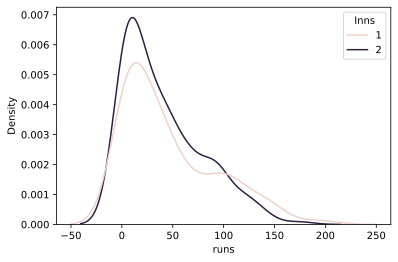

In [16]:
sns.kdeplot(data = df, x = "runs", hue = "Inns")

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF

In [18]:
e1 = ECDF(df_first_innings["runs"])
e2 = ECDF(df_second_innings["runs"])

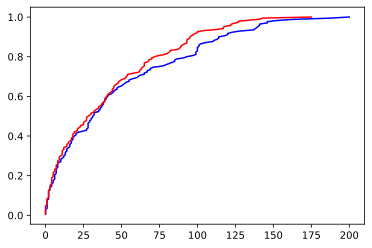

In [19]:
plt.plot(e1.x, e1.y, c='b')

plt.plot(e2.x, e2.y, c='r')

In [20]:
from scipy.stats import kstest

In [21]:
# H0 : two samples come from same distribution
# HA : two samples come from diff. distribution

alpha = 0.05

kstest(df_first_innings["runs"], 
       df_second_innings["runs"])

# p_value > alpha,  We failed to reject H0, two samples come from same distribution

KstestResult(statistic=0.10990712074303406, pvalue=0.2086874783173226)

KS : "What is the probability that these two sets of samples were drawn from the same (but unknown) 
probability distribution?" <br>
It is named after Andrey Kolmogorov and Nikolai Smirnov

## Log Normal

In [22]:
df = pd.read_csv("waiting_time.csv")

In [23]:
df

,time
0,184.003075
1,36.721521
2,29.970417
3,75.640285
4,61.489439
...,...
90041,135.885984
90042,15.223970
90043,207.839528
90044,140.488418


<AxesSubplot:xlabel='time', ylabel='Count'>

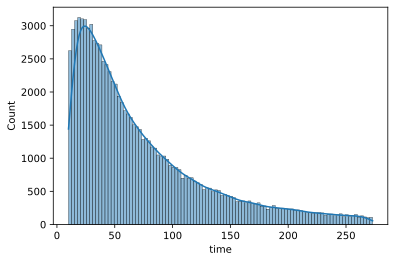

In [24]:
sns.histplot(df["time"], bins = 100, kde = True)

In [25]:
df["log_time"] = np.log(df["time"])

In [26]:
df.head()

,time,log_time
0,184.003075,5.214952
1,36.721521,3.603363
2,29.970417,3.400211
3,75.640285,4.325989
4,61.489439,4.118865


<AxesSubplot:xlabel='log_time', ylabel='Count'>

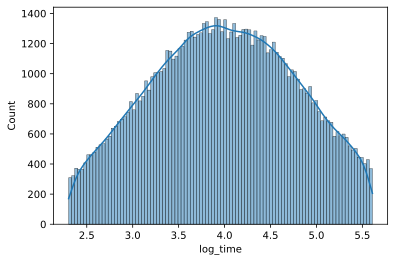

In [27]:
sns.histplot(df["log_time"], bins = 100, kde = True)

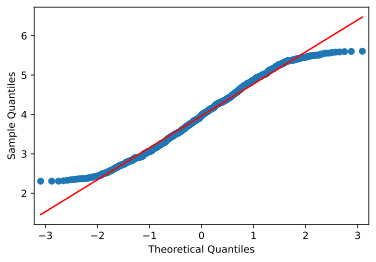

In [28]:
qqplot(df["log_time"].sample(1000), line = "s")
plt.show()

<AxesSubplot:ylabel='Count'>

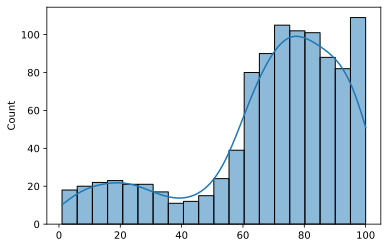

In [29]:
pers = np.arange(1,101,1)

# Make each of the last 41 elements 5x more likely
prob = [1.0]*(len(pers)-41) + [5.0]*41

# Normalising to 1.0
prob /= np.sum(prob)

number = np.random.choice(pers, 1000, p=prob)

sns.histplot(number, kde = True)

<AxesSubplot:ylabel='Count'>

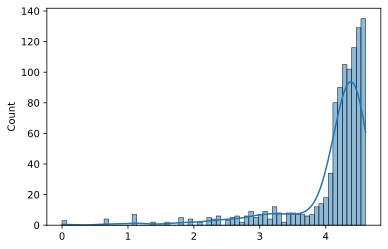

In [30]:
# np.log(number)
sns.histplot(np.log(number), kde = True)